<a href="https://colab.research.google.com/github/pandluruyuvaraj/Go-Home/blob/main/employee_burnout_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

def _warn(*argv, **kwargs):
    pass

warnings.warn = _warn

import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_excel("/content/employee_burnout_analysis-AI.xlsx")

# Remove spaces in columns names for accessing by properties
df.columns = [c.replace(' ', '_') for c in df.columns]

# Remove Employee ID on dataframe showed
df.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
df.isna().sum()

Employee_ID                0
Date_of_Joining            0
Gender                     0
Company_Type               0
WFH_Setup_Available        0
Designation                0
Resource_Allocation     1381
Mental_Fatigue_Score    2117
Burn_Rate               1124
dtype: int64

In [ ]:
df.corr().Burn_Rate[:-1]

Designation             0.737556
Resource_Allocation     0.856278
Mental_Fatigue_Score    0.944546
Name: Burn_Rate, dtype: float64

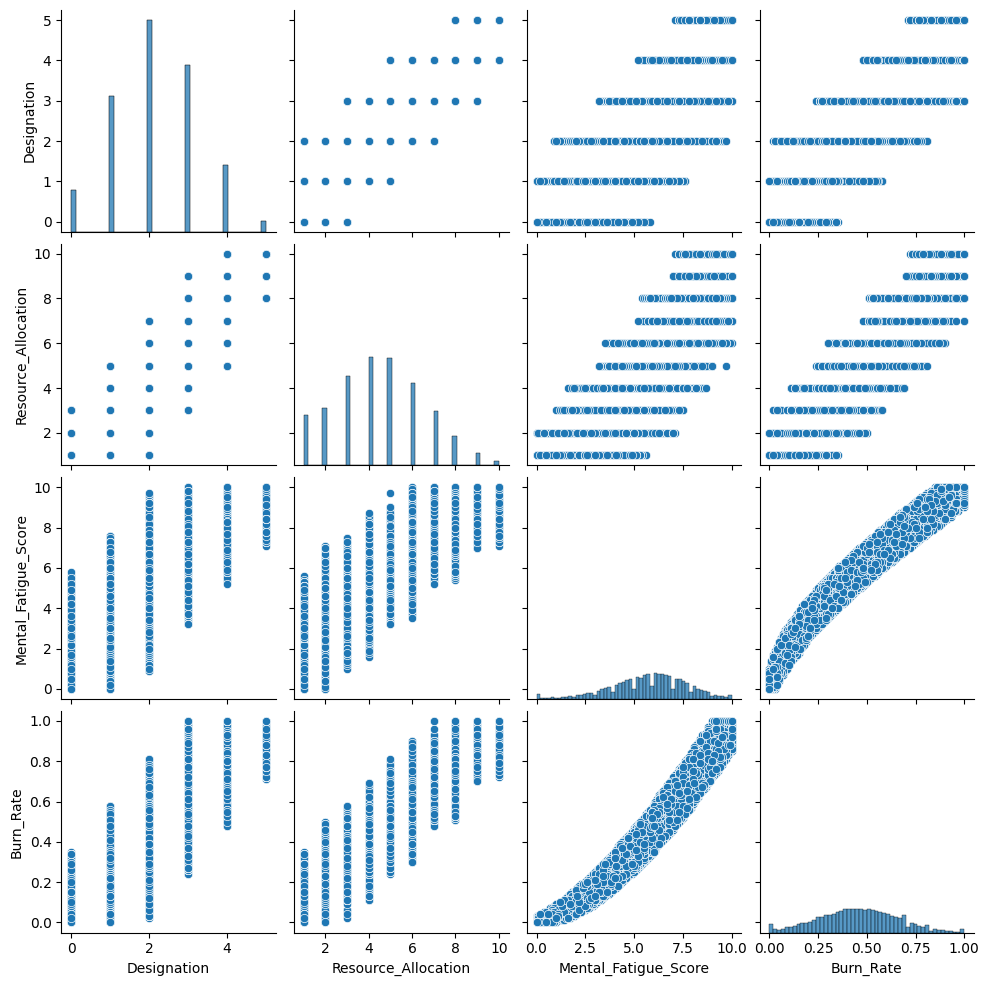

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(df)

In [ ]:
df = df.dropna()
len(df)

18590

In [ ]:
df.dtypes

Employee_ID                     object
Date_of_Joining         datetime64[ns]
Gender                          object
Company_Type                    object
WFH_Setup_Available             object
Designation                      int64
Resource_Allocation            float64
Mental_Fatigue_Score           float64
Burn_Rate                      float64
dtype: object

In [ ]:
from pprint import pprint
df_obj = df.select_dtypes(object)

# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : df_obj[c].unique()[:10] for c in df_obj.columns})

{'Company_Type': array(['Service', 'Product'], dtype=object),
 'Employee_ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH_Setup_Available': array(['No', 'Yes'], dtype=object)}


In [ ]:
df = df.drop("Employee_ID", axis=1)
df.head().T

,0,1,3,4,5
Date_of_Joining,2008-09-30 00:00:00,2008-11-30 00:00:00,2008-11-03 00:00:00,2008-07-24 00:00:00,2008-11-26 00:00:00
Gender,Female,Male,Male,Female,Male
Company_Type,Service,Service,Service,Service,Product
WFH_Setup_Available,No,Yes,Yes,No,Yes
Designation,2,1,1,3,2
Resource_Allocation,3.0,2.0,1.0,7.0,4.0
Mental_Fatigue_Score,3.8,5.0,2.6,6.9,3.6
Burn_Rate,0.16,0.36,0.2,0.52,0.29


Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

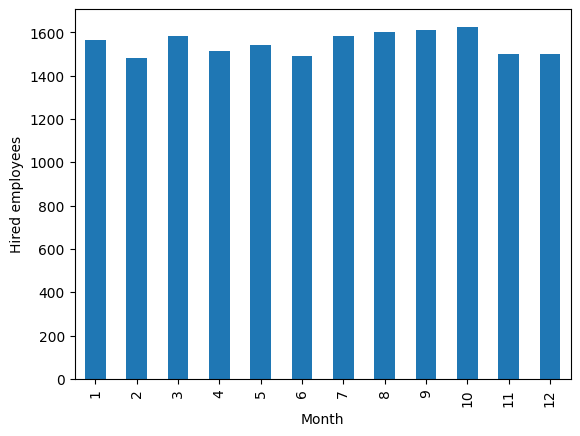

In [ ]:
import numpy as np

print(f"Min date {df.Date_of_Joining.min()}")
print(f"Max date {df.Date_of_Joining.max()}")
df_month = df.copy()

df_month["Date_of_Joining"] = df_month.Date_of_Joining.astype("datetime64")
df_month.Date_of_Joining.groupby(
        df_month.Date_of_Joining.dt.month
    ).count().plot(kind="bar", xlabel='Month', ylabel = "Hired employees")

In [ ]:
dt_2008 = pd.to_datetime(["2008-01-01"]*len(df))
df["Days"] = df.Date_of_Joining.astype("datetime64").sub(dt_2008).dt.days
df.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [ ]:
df.corr().Burn_Rate[df.select_dtypes(exclude=object).columns != "Burn_Rate"]


Designation             0.736412
Resource_Allocation     0.855005
Mental_Fatigue_Score    0.944389
Name: Burn_Rate, dtype: float64

In [ ]:
df = df.drop(["Date_of_Joining", "Days"], axis=1)
df.head().T

,0,1,3,4,5
Gender,Female,Male,Male,Female,Male
Company_Type,Service,Service,Service,Service,Product
WFH_Setup_Available,No,Yes,Yes,No,Yes
Designation,2,1,1,3,2
Resource_Allocation,3.0,2.0,1.0,7.0,4.0
Mental_Fatigue_Score,3.8,5.0,2.6,6.9,3.6
Burn_Rate,0.16,0.36,0.2,0.52,0.29


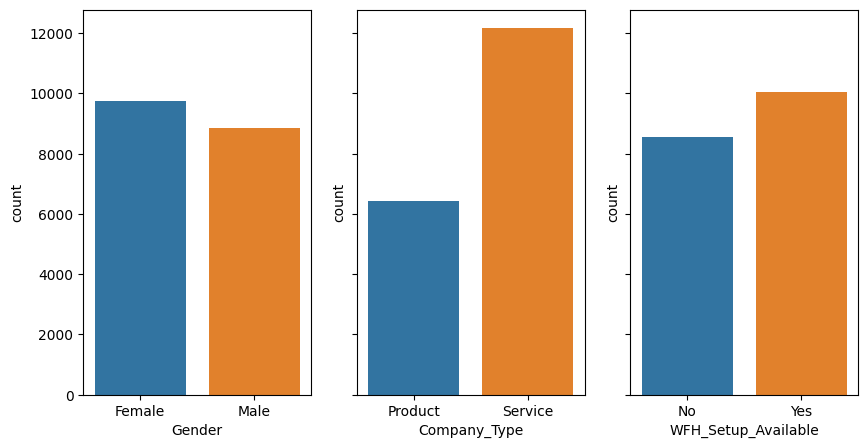

In [ ]:
cat_columns = df.select_dtypes(object).columns
num_cat_columns = len(cat_columns)

if num_cat_columns > 0:
    if num_cat_columns == 1:
        fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10, 5))
        ax = [ax]  # Convert ax to a list for consistency
    else:
        fig, ax = plt.subplots(nrows=1, ncols=num_cat_columns, sharey=True, figsize=(10, 5))

    for i, c in enumerate(cat_columns):
        df[c] = df[c].astype('category')  # Ensure the column is treated as categorical
        sns.countplot(x=c, data=df, ax=ax[i] if num_cat_columns > 1 else ax[0])
    plt.show()
else:
    print("No categorical columns found in the DataFrame.")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = df.select_dtypes(include='object').columns

for c in categorical_columns:
    sns.pairplot(df, hue=c)
    plt.title(f"Pairplot with hue: {c}")
    plt.show()


In [ ]:
from scipy.stats import normaltest

# Filter numerical columns and handle missing values
numeric_columns = df.select_dtypes(include='number').columns
df_numeric = df[numeric_columns].dropna()

# Perform normality test for each numerical column
for c in df_numeric.columns:
    p_value = normaltest(df_numeric[c])[1]
    print(f"{c}: (p-value = {p_value})")


Designation: (p-value = 7.799535630459232e-52)
Resource_Allocation: (p-value = 9.214167946666707e-96)
Mental_Fatigue_Score: (p-value = 6.8137251483124435e-124)
Burn_Rate: (p-value = 1.0375928238178144e-16)


In [ ]:
df = pd.get_dummies(df, columns=["Company_Type", "WFH_Setup_Available", "Gender"], drop_first=True)
df.head().T


,0,1,3,4,5
Designation,2.00,1.00,1.0,3.00,2.00
Resource_Allocation,3.00,2.00,1.0,7.00,4.00
Mental_Fatigue_Score,3.80,5.00,2.6,6.90,3.60
Burn_Rate,0.16,0.36,0.2,0.52,0.29
Company_Type_Service,1.00,1.00,1.0,1.00,0.00
WFH_Setup_Available_Yes,0.00,1.00,1.0,0.00,1.00
Gender_Male,0.00,1.00,1.0,0.00,1.00


In [ ]:
y_col = 'Burn_Rate'
df.columns
X = df[[c for c in df.columns if c != y_col]]
y = df[y_col]

print(X.shape)
print(y.shape)

(18590, 6)
(18590,)
